# Работа с данными и признаками

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Создаём сэмпл
n_samples = 1000

age_owner = np.random.choice(90, n_samples) + 21
length = np.random.choice(120, n_samples) + 15
width = np.random.choice(80, n_samples) + 10

price = length * width * 100 + 126

data = pd.DataFrame({'age_owner': age_owner, 'length': length, 'width': width, 'price': price})
data.head(5)

,age_owner,length,width,price
0,94,122,63,768726
1,65,74,88,651326
2,69,80,63,504126
3,107,26,57,148326
4,88,108,73,788526


In [9]:
data.age_owner.value_counts()

42    22
65    20
58    18
79    18
53    17
      ..
32     6
22     5
35     5
51     4
98     4
Name: age_owner, Length: 90, dtype: int64

In [8]:
data.describe()

,age_owner,length,width,price,mult
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,65.240000,72.262000,49.705000,3.621480e+05,3620.220000
std,26.101603,34.988935,22.989487,2.539392e+05,2539.391671
min,21.000000,15.000000,10.000000,1.912600e+04,190.000000
25%,42.000000,40.000000,30.000000,1.536510e+05,1535.250000
50%,66.000000,72.000000,51.000000,3.040760e+05,3039.500000
75%,87.000000,102.000000,70.000000,5.202010e+05,5200.750000
max,110.000000,134.000000,89.000000,1.157226e+06,11571.000000


In [3]:
X = data[['age_owner', 'length', 'width']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['age_owner', 'length', 'width']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [  20.54812957 4880.206246   7111.66260231]
Bias: -345331.21336905076
Error: 60812.43569711803


In [4]:
y.median()

304076.0

In [5]:
X = data[['length', 'width']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['length', 'width']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [4880.69432853 7110.42627435]
Bias: -343964.4715345057
Error: 60821.132016473304


In [6]:
# Создаем новый признак
data['mult'] = data['length'] * data['width']
data.head(5)

,age_owner,length,width,price,mult
0,94,122,63,768726,7686
1,65,74,88,651326,6512
2,69,80,63,504126,5040
3,107,26,57,148326,1482
4,88,108,73,788526,7884


In [7]:
X = data[['mult']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['mult']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [100.]
Bias: 126.00000000011642
Error: 5.872425390407443e-11


In [13]:
poly = PolynomialFeatures(2)

X = poly.fit_transform(data[['age_owner', 'length', 'width']])
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [ 0.00000000e+00 -1.94120275e-11  3.76276788e-12  2.79115620e-12
  6.21724894e-14  7.46069873e-14  8.17124146e-14  1.06581410e-14
  1.00000000e+02  3.90798505e-14]
Bias: 126.00000000017462
Error: 1.8887294572778047e-10


In [15]:
poly.get_feature_names_out()

array(['1', 'age_owner', 'length', 'width', 'age_owner^2',
       'age_owner length', 'age_owner width', 'length^2', 'length width',
       'width^2'], dtype=object)

Посмотрим на данные о видах красного вина

In [22]:
winequality_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [23]:
winequality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [24]:
winequality_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [25]:
winequality_df['overall'] = winequality_df['quality'].apply(lambda x : 
                                                      'Poor' if x < 5 else 'Medium' if x < 8 else 'Good' )
winequality_df.overall = winequality_df.overall.astype('category')

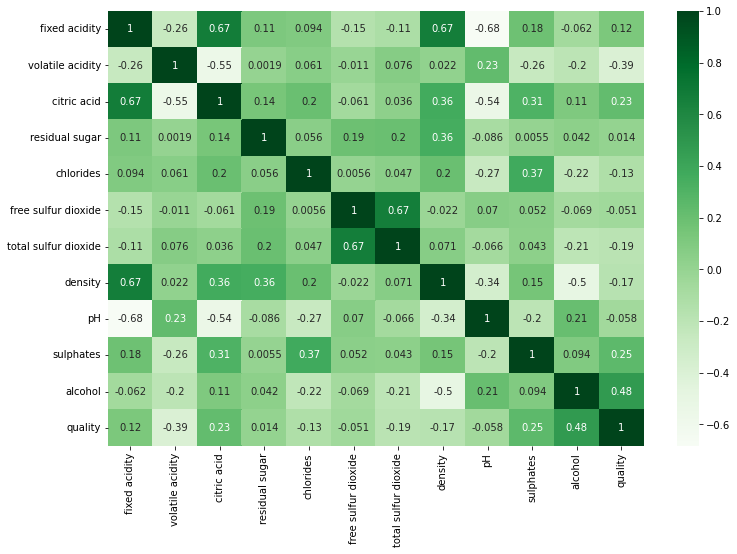

In [32]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(winequality_df.corr(), cmap='Greens', annot=True)
plt.show()

In [33]:
winequality_df.corr()[['quality']].sort_values(by='quality', ascending = False)

,quality
quality,1.000000
alcohol,0.476166
sulphates,0.251397
citric acid,0.226373
fixed acidity,0.124052
residual sugar,0.013732
free sulfur dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919


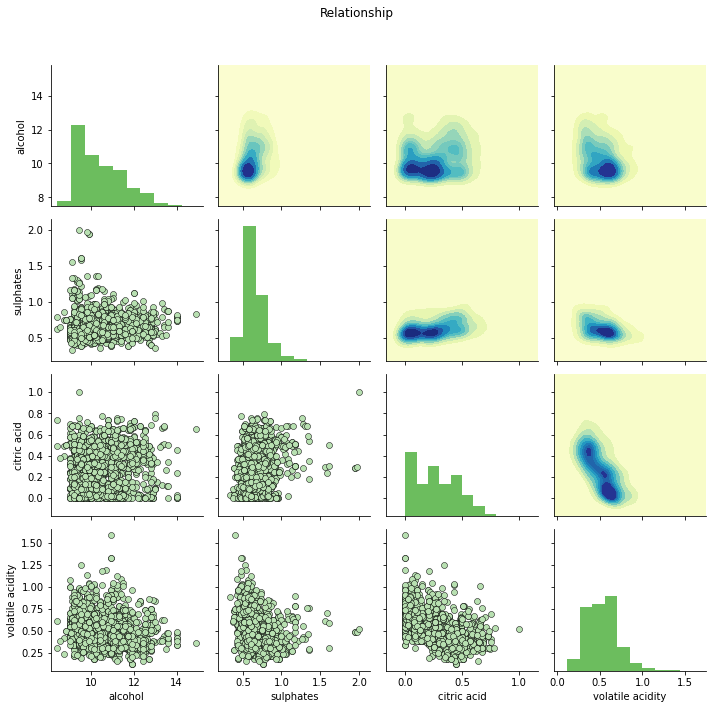

In [36]:
g = sns.PairGrid(winequality_df[['alcohol','sulphates','citric acid','volatile acidity']])
g = g.map_upper(sns.kdeplot, cmap='YlGnBu', shade=True, thresh=False)
g = g.map_diag(plt.hist, color='#6cbd5e')
g = g.map_lower(sns.scatterplot, color='#b8e0b1', edgecolor='k')

g.fig.tight_layout()
g.fig.suptitle('Relationship')
plt.subplots_adjust(top=0.9)

**Самостоятельная практика**

[Тут](https://www.kaggle.com/learn/data-cleaning) можно найти туториал с поэтапной обработкой различных признаков и практическими заданиями